# Customer Segmentations Using K-Prototypes Algorithm 🚀

---


## Project Overview

### ✨ Context  
Sebuah perusahaan e-commerce sedang berupaya untuk lebih memahami pelanggannya guna menciptakan strategi pemasaran yang lebih efektif dan efisien . Salah satu pendekatan yang dapat digunakan adalah melakukan **segmentasi pelanggan**, yaitu mengelompokkan pelanggan berdasarkan kesamaan karakteristik mereka . Segmentasi ini akan membantu perusahaan dalam menargetkan pelanggan dengan cara yang lebih personal dan releva.

### 🎯 Objective  
Melakukan **segmentasi pelanggan** berdasarkan kesamaan karakteristik mereka untuk mendukung pengambilan keputusan strategis di bidang pemasaran.

### 🛠️ Approach  
Untuk menyelesaikan tugas ini, Anda akan menggunakan pendekatan **unsupervised machine learning** dengan algoritma **K-Prototypes**. Algoritma ini dipilih karena mampu menangani data dengan kombinasi fitur **numerik** dan **kategorikal**, yang merupakan karakteristik umum pada datashkan elemen lain?

---

## Persiapan Library 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from pathlib import Path

keterangan tambahan : 
1. kmodes , digunakan untuk melakukan pemodelan menggunakan algoritma k-modes dan k-prototypes
2. pickle , digunakan untuk melakukan penyimpanan dari model yang akan dibuat

## Data Overview

In [10]:
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


disini dapat dilihat kolom dan jumlah data yang bernilai tidak null dan juga datatype nya 

## Data Exploration

### Eksplorasi Data Numerik


perhatikan bahwa disini ada dua kolom yang memiliki ata numerik yaitu umur dan nilaibelanjasetahun , kita akan menggunakan seaborn untuk melihat distribusi data dengan visualisasi berupa boxplot dan histogram 

In [15]:
# ini adalah fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(len(features), 2, figsize=(8, 7))
    for i, kol in enumerate(features):
        sns.boxplot(df[kol], ax=axs[i, 0])
        sns.histplot(df[kol], kde=True, ax=axs[i, 1])
        axs[i, 0].set_title(f"mean = {df[kol].mean():.2f}, median = {df[kol].median():.2f}, std = {df[kol].std():.2f}")
    plt.tight_layout()
    plt.show()         

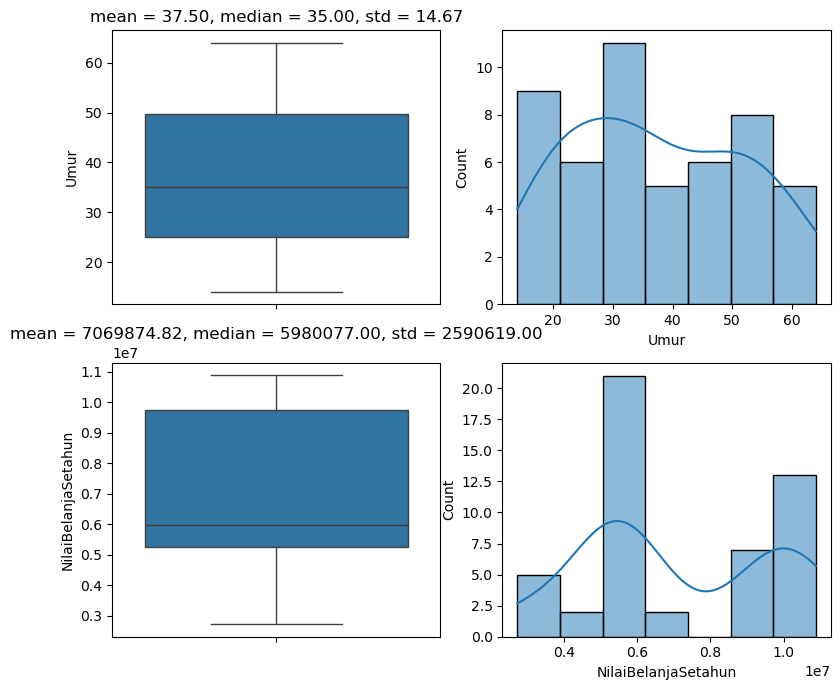

In [16]:
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

Visualisasi kolom Umur dan NilaiBelanjaSetahun menunjukkan bahwa mayoritas pelanggan berada pada rentang usia produktif (30–40 tahun) dengan distribusi yang merata, sehingga dapat menjadi fokus utama dalam strategi pemasaran. Pola pada NilaiBelanjaSetahun mengindikasikan adanya dua segmen pelanggan, yaitu dengan daya beli menengah (5–7 juta) dan tinggi (sekitar 9 juta)

### Eksplorasi Data Kategorikal


disini kita akan membuat countplot yang berisi pengetahuan mengenai kolom kategorikal

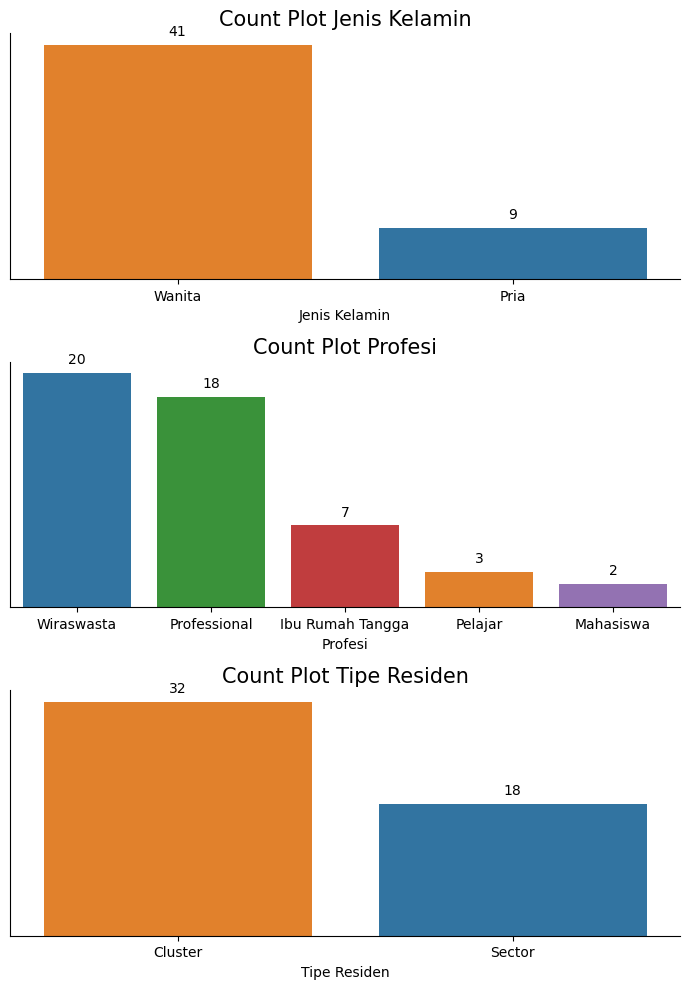

In [19]:
# Kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat canvas dan plot
fig, axs = plt.subplots(len(kolom_kategorikal), 1, figsize=(7, 10))

for i, kol in enumerate(kolom_kategorikal):
    sns.countplot(data=df, x=kol, order=df[kol].value_counts().index, ax=axs[i], hue=kol, palette="tab10", legend=False)
    axs[i].set_title(f'Count Plot {kol}', fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axs[i].axes.yaxis.set_visible(False)
    sns.despine(ax=axs[i], right=True, top=True)

plt.tight_layout()
plt.show()

disini kita lihat bahwa ada perbedaan yang cukup besar antara pria dan wanita secara jumlah 

**Note** : pada kesempatan ini saya mencoba membuat fungsi untuk proses standardisasi dan label encoding yang berbeda dengan pendekatan yang beberapa kali sebelumnya saya lakukan untuk memvisualisasikan dan mengobservasi perubahan yang terjadi

## Data Prep

kita akan menggunakan algoritma machine learning yang memerlukan data yang skala antar variabelnya setara dan juga kita harus melakukan encoding terhadap kolom kolom kategorikal menjadi numerik kemudian menggabungkannya menjadi satu dataframe

### Standardisasi Kolom Numerik

In [25]:
# ini adalah statistik sebelum standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik].describe().round(1))

#proses standardisasi 
sc = StandardScaler()
df_std = sc.fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(
    data=df_std,
    index=df.index,
    columns=df[kolom_numerik].columns
)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('\nStatistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421

Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


### Konversi Kategorikal Data dengan Label Encoder

In [27]:
# ini adalah salinan dataframe
df_encode = df[kolom_kategorikal].copy()

# labelencoder 
for col in kolom_kategorikal :
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

df_encode.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


## Merging

In [29]:
df_gabungan = pd.concat([df_encode,df_std] , axis =1)
df_gabungan.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


dari sini data yang digunakan sudah terstandardisasi dan juga siap untuk digunakan sebagai parameter pada model machine learning 

## Modelling

### About K-Prototypes Algorithm


K-Prototypes adalah algoritma clustering yang menggabungkan elemen-elemen dari algoritma K-Means dan K-Medoids untuk menangani dataset yang berisi kedua jenis data, yaitu numerik dan kategorikal. Algoritma ini digunakan untuk mengelompokkan data yang memiliki campuran tipe data tersebut, yang tidak dapat ditangani dengan algoritma K-Means tradisional yang hanya bekerja dengan data numerik.

### Mencari Cluster Optimal Using Elbow Plot

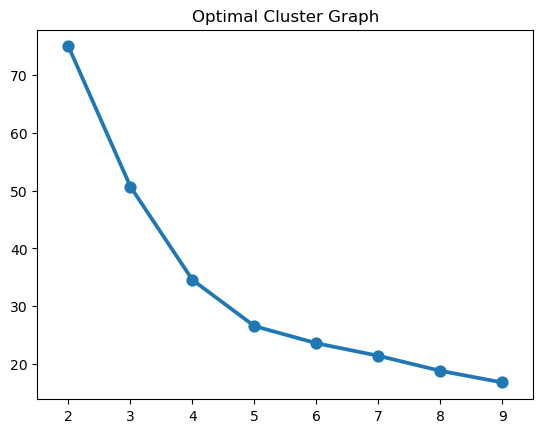

In [56]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k ,random_state=75)  
    kproto.fit_predict(df_gabungan, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.title('Optimal Cluster Graph')
plt.show()

Dari hasil tersebut, kita dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga diputuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.

### Membuat Model

In [60]:
kproto = KPrototypes(n_clusters=5, random_state=75)  
kproto = kproto.fit(df_gabungan, categorical=[0, 1, 2])  
  
# Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))

Model tersebut disimpan ke file cluster.pkl, sehingga dapat digunakan kembali tanpa perlu melakukan proses fitting ulang. Model dapat dimuat kembali dengan pickle.load.

### menggunakan model

In [68]:
# menentukan segmen tiap pelanggan 
clusters = kproto.predict(df_gabungan, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# menggabungkan data awal dan segmen pelanggan 
df_final = df.copy()
df_final['Cluster'] = clusters
print(df_final.head())

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  Cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


## Observasi

### Hasil Per Cluster

In [76]:
for i in range(0,5) :
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['Cluster'] == i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  Cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

### Visualisasi Hasil Clustering

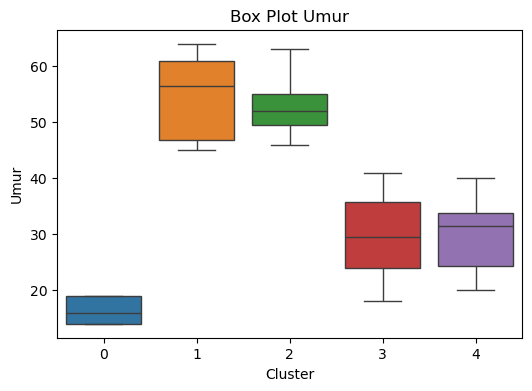

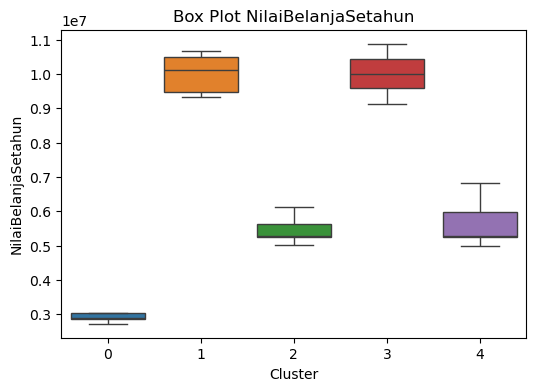

In [88]:
for i in kolom_numerik:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x='Cluster', y=i, data=df_final, hue='Cluster', palette='tab10', dodge=False)
    plt.title(f'Box Plot {i}', fontsize=12)
    plt.xlabel('Cluster')
    plt.ylabel(i)
    plt.legend([], [], frameon=False)
    plt.show()

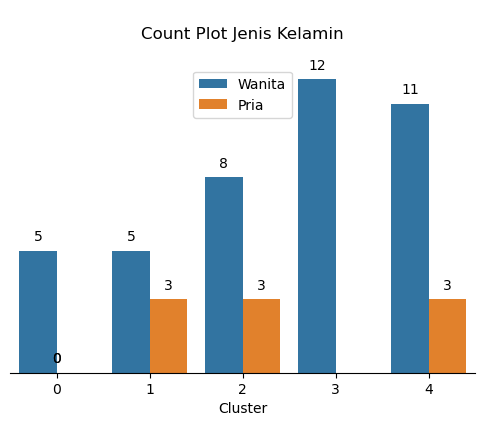

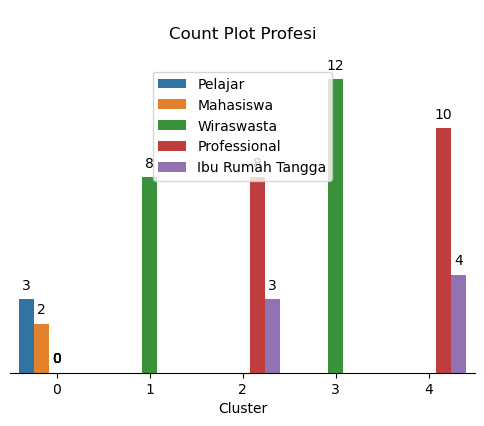

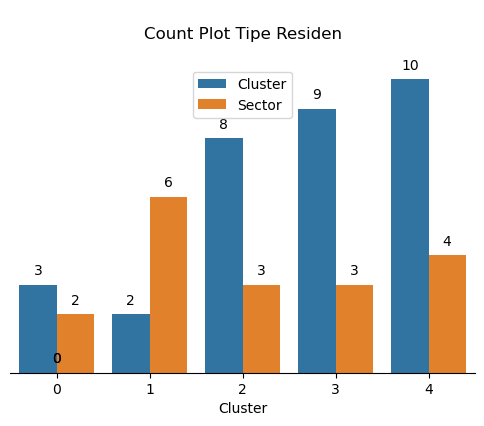

In [95]:
for i in kolom_kategorikal:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df_final, x='Cluster', hue=i)
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper center")
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')
    
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

### Menamakan Cluster

Dari hasil observasi yang dilakukan, kamu dapat memberikan nama segmen untuk tiap-tiap nomor kluster sebagai berikut:

**Cluster 0: Diamond Young Entrepreneur**

Berisi para wiraswasta dengan nilai transaksi rata-rata mendekati 10 juta.
Rentang umur: 18 - 41 tahun, dengan rata-rata 29 tahun.

**Cluster 1: Diamond Senior Entrepreneur**

Berisi para wiraswasta dengan nilai transaksi rata-rata mendekati 10 juta.
Rentang umur: 45 - 64 tahun, dengan rata-rata 55 tahun.

**Cluster 2: Silver Students**

Berisi para pelajar dan mahasiswa.
Rata-rata umur: 16 tahun.
Nilai belanja setahun mendekati 3 juta.

**Cluster 3: Gold Young Member**

Berisi para profesional dan ibu rumah tangga berusia muda.
Rentang umur: 20 - 40 tahun, dengan rata-rata 30 tahun.
Nilai belanja setahun mendekati 6 juta.

**Cluster 4: Gold Senior Member**

Berisi para profesional dan ibu rumah tangga berusia tua.
Rentang umur: 46 - 63 tahun, dengan rata-rata 53 tahun.
Nilai belanja setahun mendekati 6 juta. juta.

In [100]:
df_final['Segmen'] = df_final['Cluster'].map({
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'
})
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster,Segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0,Diamond Young Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Silver Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Silver Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3,Gold Young Member


In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   Cluster              50 non-null     uint16
 8   Segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.4+ KB


---

### Terima Kasih 🙏😊